# Functional (not experimental) notebook to extract data from Google's community mobility report

In [1]:
# Load sgv files
from svglib.svglib import svg2rlg
import os

file_list = [file for file in os.scandir('data/figures') if file.name.split('.')[-1] == 'svg']
file_list
#drawing = svg2rlg("/Users/v/Desktop/Retail - recreation.svg")

[<DirEntry 'Residential.svg'>,
 <DirEntry 'Grocery & pharmacy.svg'>,
 <DirEntry 'Parks.svg'>,
 <DirEntry 'Retail - recreation.svg'>,
 <DirEntry 'Workplaces.svg'>,
 <DirEntry 'Transit stations.svg'>]

In [2]:
from reportlab.graphics.shapes import PolyLine, Line
import matplotlib.pyplot as plt

def get_type(figure, type_ = PolyLine, check_one = True):
    def get_types(branch, types = []):
        if type(branch) == type_:
            types.append(branch)
        try:
            for sub_branch in branch.getContents():
                types = get_types(sub_branch, types)
        except:
            pass
        
        return types
    

    types = get_types(figure)
    
    if len(types) > 1:
        if check_one:
            print(f'Found more than one {str(type_)}, please check result')
        return types
    else:
        return types[0]
    

def plot_line(line):
    x, y = [line.x1, line.x2], [line.y1 * -1, line.y2 * -1]
    plt.plot(x, y)
  

## Just check that all images have the same reference frame

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


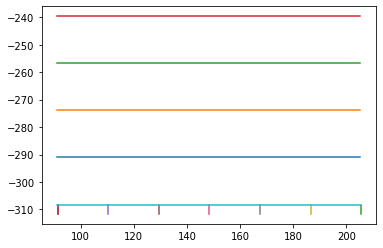

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


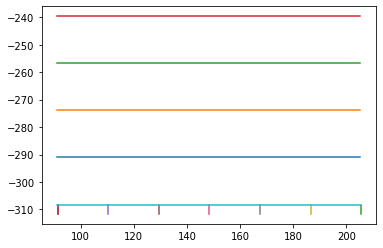

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


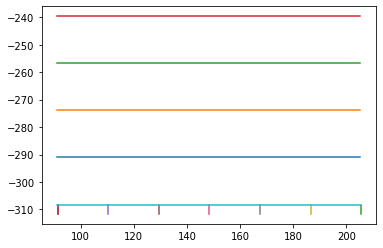

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


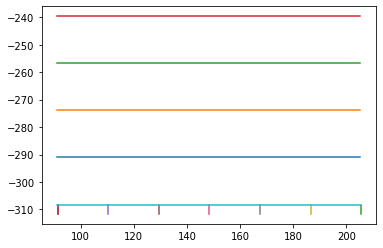

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


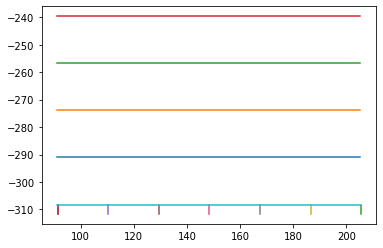

lines[0].y1 = 308.2
lines[1].y1 = 308.2
lines[2].y1 = 308.2
lines[3].y1 = 308.2
lines[4].y1 = 308.2
lines[5].y1 = 308.2
lines[6].y1 = 308.2
lines[7].y1 = 308.2
lines[8].y1 = 308.2
lines[9].y1 = 308.2
lines[10].y1 = 291.06
lines[11].y1 = 273.91
lines[12].y1 = 256.76
lines[13].y1 = 239.61


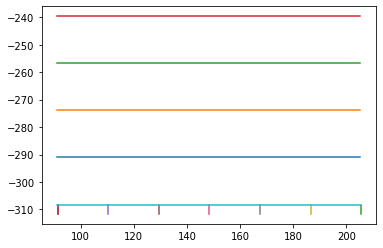

In [3]:
 
for file in file_list:
    drawing = svg2rlg(f'data/figures/{file.name}')
    lines = get_type(drawing, Line, False)
    for i, line in enumerate(lines):
        print(f'lines[{i}].y1 = {line.y1}')
        plot_line(line)
    plt.show()
    plt.close()

In [4]:
import pandas as pd
import datetime
from collections import namedtuple

Ref = namedtuple('Reference', ['rate', 'level'])

ref = Ref(-.4, -291.06)

def polyline2df(poliline, baseline, ref, start_date = datetime.date(2020, 2, 16), yname = 'ratio'):
    df = pd.DataFrame()
    factor = ref.rate / (ref.level - baseline)
    
    x, y = [], []
    for i, value in enumerate(poliline.points):
        if i % 2 == 0:
            x.append(start_date)
            start_date = start_date + datetime.timedelta(days=1)
        elif i % 2 == 1:
            y.append(((value * -1) - baseline) * factor)
            
    df['date'] = x
    df[yname] = y
    
    return df.set_index('date')

In [5]:
dataframes = []

for file in file_list:
    drawing = svg2rlg(f'data/figures/{file.name}')
    polyline = get_type(drawing, PolyLine, True)
    data_name = file.name.split('.')[0]
    print(data_name)
    df = polyline2df(polyline, -273.91, ref, yname = data_name)
    dataframes.append(df)

Residential
Grocery & pharmacy
Parks
Retail - recreation
Workplaces
Transit stations


In [6]:
df = pd.concat(dataframes, axis=1)
df.reset_index().to_feather('gcmr.feather')
df.to_csv('gcmr.csv')